<h1>PROGETTO PYTHON MICHELE CECCARINI</h1>

In [51]:
#Importazione librerie

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>PRONTI?</h2>

In [52]:
from time import sleep 

mins = 10

while mins >= 0:
    if mins ==5:
        print('Scegliete velocemente un posto a sedere! Mancano solo 5 secondi.')
    elif mins ==2:
        print('Ci siete? Ci siamo quasi!')
    elif mins == 0:
        print('Buona lettura!')
    else:
        print(mins)
    mins -= 1
    sleep(1)

10
9
8
7
6
Scegliete velocemente un posto a sedere! Mancano solo 5 secondi.
4
3
Ci siete? Ci siamo quasi!
1
Buona lettura!


<h2> Un primo sguardo ai dati</h2>

In [53]:
#Importiamo i due dataset
#Utilizziamo .head() per dare una prima occhiata
df = pd.read_csv(r"C:\Users\utente\Dropbox\PC\Desktop\Cartella progetto\googleplaystore.csv")
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [54]:
df.shape

(10841, 13)

In [55]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Possiamo notare come il dataset sia composto da 13 colonne e 10841 righe. Inoltre nella colonna ' Rating ' ci sono diversi valori nulli.

<h2>Un pò di pulizia</h2>

In [57]:
#Isoliamo i valori nulli della colonna 'Rating' 
null_rating = df[df['Rating'].isnull()]
null_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Sostituisco i valori NaN della colonna 'Rating' con la loro media come da best practice. 

In [58]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [60]:
df.describe()

,Rating
count,10841.000000
mean,4.193338
std,0.499557
min,1.000000
25%,4.100000
50%,4.200000
75%,4.500000
max,19.000000


Da una prima analisi dei principali parametri statistici notiamo che se il valore minimo 1 della colonna rating è credibile, lo è sicuramente meno il valore massimo di 19 in quanto le votazioni vanno da 1 a 5. Trattasi quindi di dati che vanno corretti.

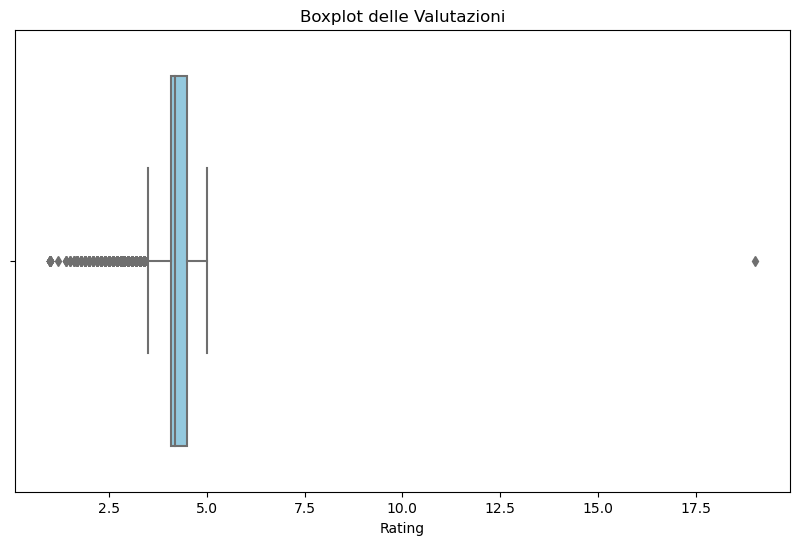

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating'], color='skyblue')
plt.title('Boxplot delle Valutazioni')
plt.xlabel('Rating')
plt.show()

In [62]:
df['Rating'].value_counts()

Rating
4.193338     1474
4.400000     1109
4.300000     1076
4.500000     1038
4.200000      952
4.600000      823
4.100000      708
4.000000      568
4.700000      499
3.900000      386
3.800000      303
5.000000      274
3.700000      239
4.800000      234
3.600000      174
3.500000      163
3.400000      128
3.300000      102
4.900000       87
3.000000       83
3.100000       69
3.200000       64
2.900000       45
2.800000       42
2.700000       25
2.600000       25
2.500000       21
2.300000       20
2.400000       19
1.000000       16
2.200000       14
1.900000       13
2.000000       12
1.700000        8
1.800000        8
2.100000        8
1.600000        4
1.400000        3
1.500000        3
1.200000        1
19.000000       1
Name: count, dtype: int64

In [63]:
df[df['Rating'] == 19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Si tratta dell'app 'Life Made WI-Fi Touchscreen Photo Frame', come mostrato sopra. Ho deciso che cancellerò direttamente la riga piuttosto che aggiustare il valore del 'rating' per esempio inserendo una media 'Rating' al posto di '19.0'. Questo perchè questa riga contiente anche altri valori nulli, quindi la sua eliminazione non influirà nell'analisi del dataset. 

In [64]:
df = df.drop(df[df['Rating'] == 19.0].index)

In [65]:
df.describe()

,Rating
count,10840.000000
mean,4.191972
std,0.478907
min,1.000000
25%,4.100000
50%,4.200000
75%,4.500000
max,5.000000


Il valore massimo risulta corretto. 

Controllo se nel dataset sono presenti duplicati e nel caso li rimuovo

In [66]:
df.duplicated().sum()

483

In [67]:
df = df.drop_duplicates()
df.duplicated().sum()

0

Preferisco convertire subito colonne numeriche da object a valori numerici e date così da facilitarne l'utilizzo successivamente

In [68]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('$', ''), errors='coerce')

In [69]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [70]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  int64         
 4   Size            10357 non-null  object        
 5   Installs        10357 non-null  object        
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10349 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


<h2>Le app più scaricate</h2>

Voglio considerare le applicazioni più scaricate e capire quali sono. 

In [72]:
df['Installs'].value_counts()

Installs
1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: count, dtype: int64

<Axes: xlabel='Installs'>

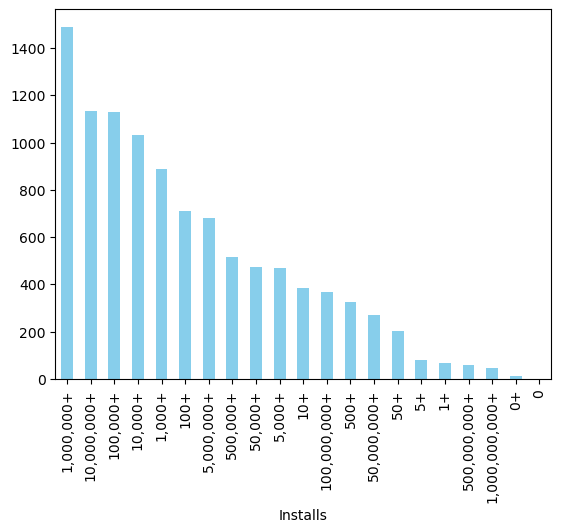

In [73]:
df['Installs'].value_counts().plot(kind='bar', color='skyblue')

In [74]:
df.sort_values(['Installs'], ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1886,Temple Run 2,GAME,4.3,8119151,62M,"500,000,000+",Free,0.0,Everyone,Action,2018-07-05,1.49.1,4.0 and up
3711,MX Player,VIDEO_PLAYERS,4.5,6474672,Varies with device,"500,000,000+",Free,0.0,Everyone,Video Players & Editors,2018-08-06,Varies with device,Varies with device
2603,Snapchat,SOCIAL,4.0,17014705,Varies with device,"500,000,000+",Free,0.0,Teen,Social,2018-07-30,Varies with device,Varies with device
1920,Temple Run 2,GAME,4.3,8119154,62M,"500,000,000+",Free,0.0,Everyone,Action,2018-07-05,1.49.1,4.0 and up
4566,SHAREit - Transfer & Share,TOOLS,4.6,7775146,17M,"500,000,000+",Free,0.0,Everyone,Tools,2018-07-30,4.5.28_ww,4.1 and up
1729,Temple Run 2,GAME,4.3,8118937,62M,"500,000,000+",Free,0.0,Everyone,Action,2018-07-05,1.49.1,4.0 and up
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0.0,Everyone,Casual,2018-07-19,4.8.0.132,4.1 and up
467,Viber Messenger,COMMUNICATION,4.3,11335255,Varies with device,"500,000,000+",Free,0.0,Everyone,Communication,2018-07-18,Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,0.0,Everyone,Tools,2018-08-04,4.6.6,Varies with device
3755,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,Varies with device,"500,000,000+",Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device


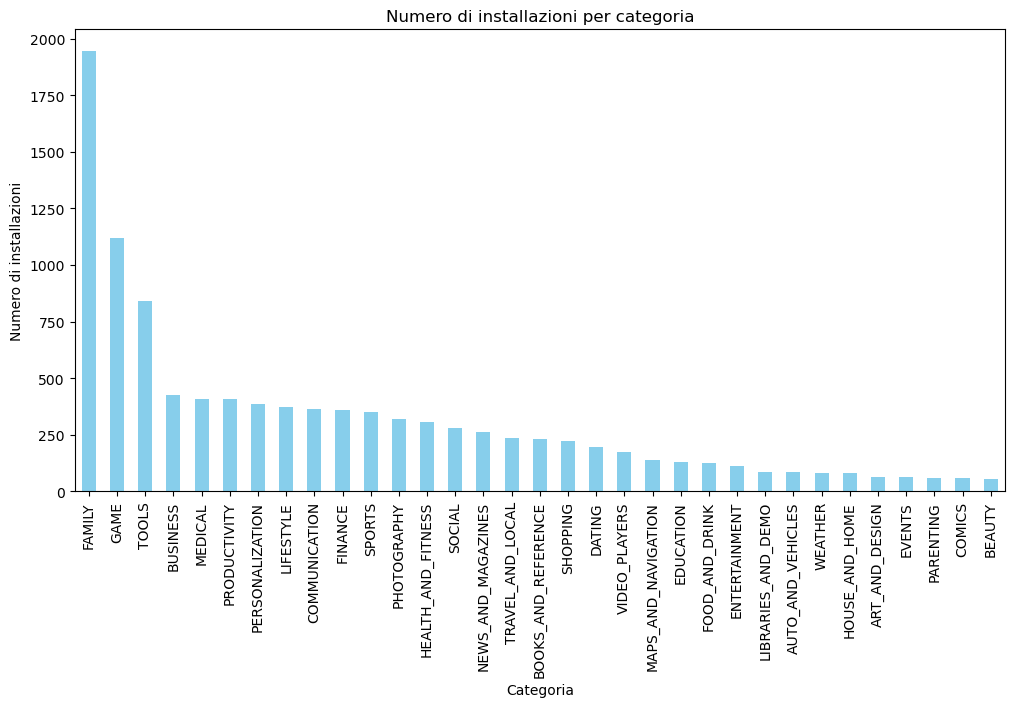

In [75]:
category_counts = df.groupby('Category')['Installs'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color = 'skyblue')
plt.title('Numero di installazioni per categoria')
plt.xlabel('Categoria')
plt.ylabel('Numero di installazioni')
plt.show()

In [80]:
df['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

*Osserviamo che le categorie FAMILY, GAME e TOOLS siano nettamente quelle più installate*

Analizziamo più da vicino le top 3 'Category'

In [81]:
top3 = ['FAMILY','GAME','TOOLS']
df_top3 = df[df['Category'].isin(top3)].copy()

Vediamo quale sono le più installate

In [82]:
df_top3.sort_values('Installs', ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Year Updated
1729,Temple Run 2,GAME,4.3,8118937,62M,"500,000,000+",Free,0.0,Everyone,Action,2018-07-05,1.49.1,4.0 and up,2018
4147,Gboard - the Google Keyboard,TOOLS,4.2,1855262,Varies with device,"500,000,000+",Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,2018
3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693,17M,"500,000,000+",Free,0.0,Everyone,Tools,2018-07-30,4.5.28_ww,4.1 and up,2018
3265,Gboard - the Google Keyboard,TOOLS,4.2,1859115,Varies with device,"500,000,000+",Free,0.0,Everyone,Tools,2018-07-31,Varies with device,Varies with device,2018
3907,Google Translate,TOOLS,4.4,5741684,Varies with device,"500,000,000+",Free,0.0,Everyone,Tools,2018-08-04,Varies with device,Varies with device,2018
1908,My Talking Tom,GAME,4.5,14892469,Varies with device,"500,000,000+",Free,0.0,Everyone,Casual,2018-07-19,4.8.0.132,4.1 and up,2018
1702,Pou,GAME,4.3,10485334,24M,"500,000,000+",Free,0.0,Everyone,Casual,2018-05-25,1.4.77,4.0 and up,2018
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0.0,Everyone,Casual,2018-07-19,4.8.0.132,4.1 and up,2018
3235,Google Translate,TOOLS,4.4,5745093,Varies with device,"500,000,000+",Free,0.0,Everyone,Tools,2018-08-04,Varies with device,Varies with device,2018
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,2018


In [83]:
combined_categories_genres = df['Category'] + '_' + df_top3['Genres']

occurrences_count = combined_categories_genres.value_counts()

occurrences_count.head(20)

TOOLS_Tools                     842
FAMILY_Entertainment            487
FAMILY_Education                420
GAME_Action                     356
GAME_Arcade                     218
FAMILY_Simulation               189
FAMILY_Casual                   148
FAMILY_Puzzle                    98
GAME_Racing                      98
FAMILY_Role Playing              93
FAMILY_Strategy                  83
GAME_Adventure                   75
GAME_Card                        48
GAME_Board                       44
GAME_Casual                      43
GAME_Casino                      39
GAME_Puzzle                      38
FAMILY_Educational;Education     38
GAME_Trivia                      38
FAMILY_Educational               37
Name: count, dtype: int64

Questo raggruppamento è particolarmente interessante perchè ci indica quali sono i generi per categoria più scaricati. 
La variabile 'TOOLS_Tools' ci raggruppa tutto ciò che appertiene al genere tools, non avendo questa dei sottogeneri. 
Mentre le categorie FAMILY e GAMES, avendo diversi sottogeneri, vengono diversificate maggiormente.


*Le app di categoria TOOLS, FAMILY ( intrattenimento ed educazione) e GAMES( action ed arcade) sono nettamente quelle più scaricate*

<h2>Pubblico di riferimento</h2>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Mature 17+'),
  Text(3, 0, 'Everyone 10+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

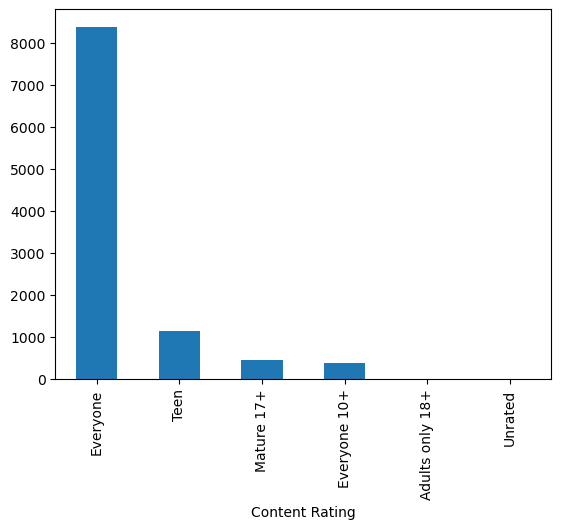

In [84]:
df['Content Rating'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)

*Un bacino di utenza maggiore come EVERYONE risulta molto più interessante rispetto agli altri*

<h2>"Sì ma quanto costa?"</h2>

In [85]:
df_top3.value_counts('Price')

Price
0.00      3559
2.99        73
0.99        68
4.99        45
1.99        40
3.99        25
1.49        17
2.49        10
9.99         7
14.99        6
6.99         6
5.99         6
4.49         4
399.99       3
12.99        2
7.99         2
3.49         2
19.99        2
2.50         1
17.99        1
13.99        1
14.00        1
1.00         1
16.99        1
19.40        1
10.00        1
25.99        1
29.99        1
39.99        1
46.99        1
389.99       1
10.99        1
1.04         1
2.59         1
8.99         1
7.49         1
1.20         1
1.26         1
1.59         1
1.61         1
4.77         1
1.76         1
1.97         1
3.90         1
3.28         1
2.00         1
2.95         1
4.84         1
Name: count, dtype: int64

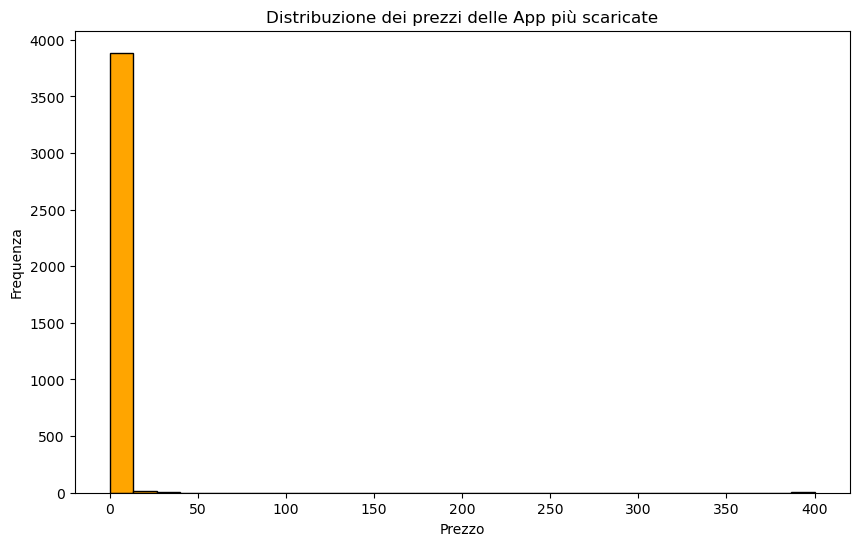

In [86]:
paid_apps_df = df_top3[df_top3['Price'] >= 0]

plt.figure(figsize=(10, 6))
plt.hist(paid_apps_df['Price'], bins=30, edgecolor='black', color='orange')
plt.title('Distribuzione dei prezzi delle App più scaricate')
plt.xlabel('Prezzo')
plt.ylabel('Frequenza')
plt.show()

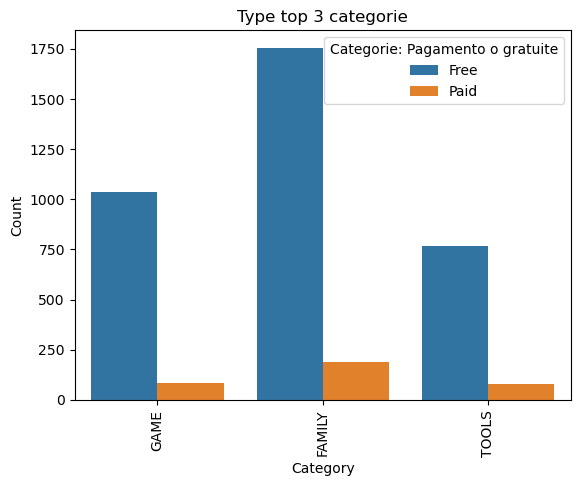

In [87]:
sns.countplot(x='Category', hue='Type', data=df_top3)
plt.title('Type top 3 categorie')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Categorie: Pagamento o gratuite')
plt.xticks(rotation=90)
plt.show()

*Appare evidente che il maggior numero di App scaricate siano gratuite.*

<h2>Rating</h2>

Vorrei capire come sono distribuite le valutazioni ed identificare eventuali outliers.

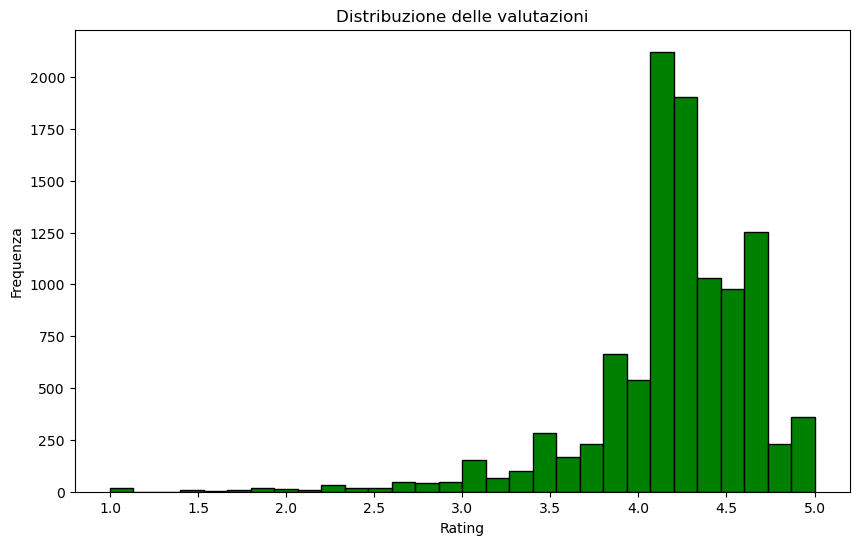

In [97]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=30, edgecolor='black', color='green')
plt.title('Distribuzione delle valutazioni')
plt.xlabel('Rating')
plt.ylabel('Frequenza')
plt.show()

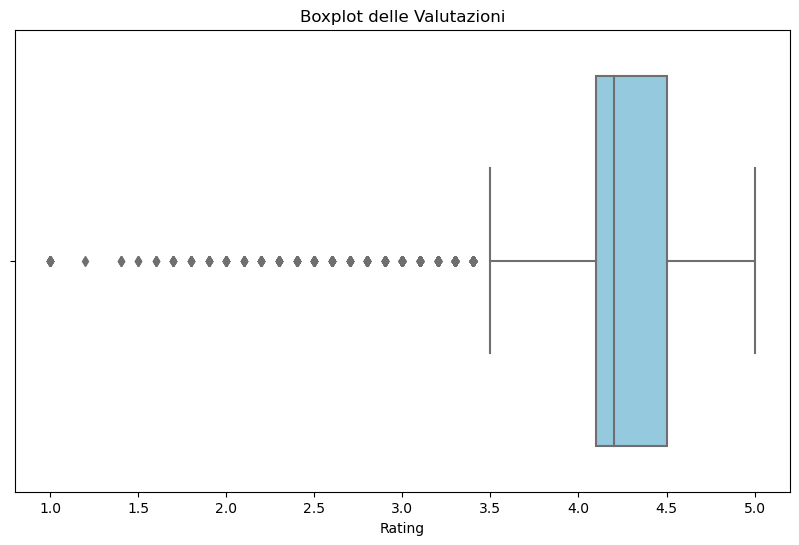

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating'], color='skyblue')
plt.title('Boxplot delle Valutazioni')
plt.xlabel('Rating')
plt.show()

Questo boxplot ci mostra come effettivamente ci siano diversi outliers "al ribasso". La mediana infatti si attesta circa su 4.2

In [90]:
df['Rating'].median()

4.2

In [91]:
soglia_rating = 4.0

applicazioni_con_rating_superiore = df[df['Rating'] > soglia_rating]

print(f"Il numero di applicazioni con rating superiore a {soglia_rating} è : {len(applicazioni_con_rating_superiore)}")


Il numero di applicazioni con rating superiore a 4.0 è : 7873


<h2>Recensioni</h2>

Voglio confrontare il numero di installazioni con il numero di recensioni, tuttavia la colonna 'reviews'.

In [92]:
df['Reviews'].dtypes

dtype('int64')

In [93]:
correlation_reviews = df['Rating'].corr(df['Reviews'])
correlation_reviews

0.06836303106013991

(0.0, 82115112.39885415)

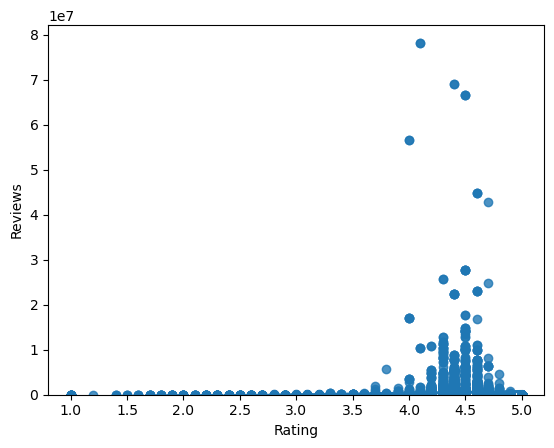

In [94]:
sns.regplot(x="Rating", y="Reviews", data=df)
plt.ylim(0,)

Questo indice di correlazione di aggira intorno alle 0, quindi non vi è una correlazione lineare tra il tipo di valutazione e il numero delle recensioni delle App.

<h2>Aggiornamenti</h2>

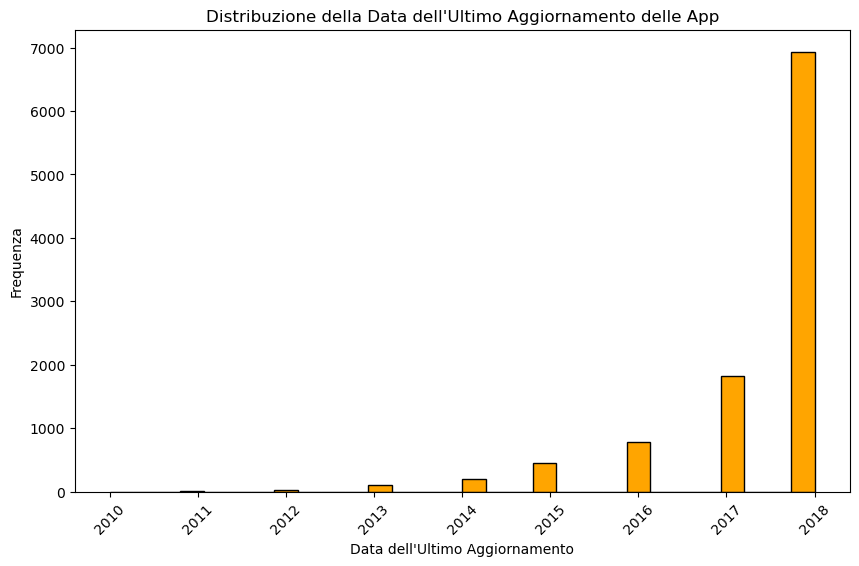

In [95]:
df['Last Year Updated'] = df['Last Updated'].dt.year

plt.figure(figsize=(10, 6))
plt.hist(df['Last Year Updated'], bins=30, edgecolor='black', color='orange')
plt.title('Distribuzione della Data dell\'Ultimo Aggiornamento delle App')
plt.xlabel('Data dell\'Ultimo Aggiornamento')
plt.ylabel('Frequenza')
plt.xticks(rotation=45)  
plt.show()

*La maggior parte degli aggiornamenti sono stati fatti nel 2018*

<h2>Cosa portarsi a casa</h2>

1- La maggior parte delle applicazioni scaricate si sono indirizzate ad un uso aperto a tutta la famiglia e al gaming, quindi al grande pubblico;
2- La maggior parte delle valutazioni sono positive, indice di un generale apprezzamento del pubblico per le app;
3- Vi è un enorme mole di download, questo indica un grande bacino di utenza in espansione;
4- E' preferibile rendere gratuita l'applicazione, magari dedicandosi maggiormente all'inserimento di annunci interni o offrendo diversi piani di pagamento per l'utilizzo;
5- Considerata la mole di aggiornamenti ricevuti nell'anno 2018, questo indica un costante lavoro da parte degli sviluppatori e l'importanza di non lasciare a sè stessa l'app nel tempo e garantirne quindi un utilizzo prolungato;
6- Sarebbe interessante anche analizzare il tempo che queste app sono state installate, quando e perchè sono state disinstallate, così da identificare il profilo di utenza che utilizza per minor tempo le app. Questo ci permetterebbe di intervenire per tempo, magari con servizi personalizzati volti a limitare l'abbandono.